<a href="https://colab.research.google.com/github/manueljosema/Primer-commit-a-adir-README.md/blob/main/Preparaci%C3%B3n_Examen_Unidad_Simulaci%C3%B3n_del_Examen_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos la semilla para reproducibilidad
np.random.seed(42)

# Generamos los datos sintéticos
user_id = range(1, 301)
app_version = np.random.choice(['1.0', '1.1', '1.2', '1.3'], 300)
platform = np.random.choice(['Android', 'iOS'], 300)
session_duration = np.random.randint(1, 180, 300)
number_of_sessions = np.random.randint(1, 20, 300)
country = np.random.choice(['USA', 'Canada', 'Mexico', 'UK', 'Germany', 'France', 'Spain', 'Italy'], 300)
user_feedback = np.random.randint(1, 6, 300)

# Creamos el DataFrame
data = pd.DataFrame({
    'user_id': user_id,
    'app_version': app_version,
    'platform': platform,
    'session_duration': session_duration,
    'number_of_sessions': number_of_sessions,
    'country': country,
    'user_feedback': user_feedback
})

# Guardamos los datos en un archivo CSV
data.to_csv('user_app_data.csv', index=False)
print("Datos generados y guardados en 'user_app_data.csv'")

Datos generados y guardados en 'user_app_data.csv'


In [7]:
df = pd.read_csv('user_app_data.csv')
df.head(10)
#

,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback
0,1,1.2,Android,109,11,France,1
1,2,1.3,Android,116,17,UK,2
2,3,1.0,Android,94,13,France,5
3,4,1.2,iOS,47,1,Canada,4
4,5,1.2,iOS,99,2,Canada,3
5,6,1.3,Android,55,9,Germany,4
6,7,1.0,iOS,168,3,Mexico,2
7,8,1.0,iOS,52,1,Canada,4
8,9,1.2,iOS,144,16,USA,1
9,10,1.1,iOS,13,6,France,2


### 1) Limpieza de Datos:

El primer paso en este proceso es usar Python para limpiar los datos y dejarlos listos para el análisis. Deben:

* **Identificar y abordar cualquier valor duplicado.**
* **Identificar y abordar cualquier dato que falte en este conjunto de datos.** Trátenlos de forma adecuada. Incluyan una breve descripción en el método que usan para tratar con los valores que faltan junto con una justificación para el uso de ese método.
* **Asegurarse de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.**
* **Identificar y abordar cualquier inconsistencia en los valores categóricos** (ejemplo: android, Android, ANDROID).
* **Identificar y abordar cualquier punto de datos inapropiados o inusuales**(ejemplo: tiempo de uso de 10000 horas en una semana).


In [8]:
# Identificar duplicados
duplicates = data.duplicated().sum()
print(f'Número de duplicados: {duplicates}')

# Eliminar duplicados
data = data.drop_duplicates()

Número de duplicados: 0


In [10]:
# Identificar y abordar cualquier dato que falte en este conjunto de datos
print("Valores que faltan:", data.isnull().sum())
# En este caso, no hay valores que falten, pero si los hubiera, podríamos utilizar:
# data.fillna(method='ffill', inplace=True)  # Rellena con el valor anterior
# data.fillna(method='bfill', inplace=True)  # Rellena con el valor posterior
# data.fillna(data.mean(), inplace=True)  # Rellena con la media

Valores que faltan: user_id               0
app_version           0
platform              0
session_duration      0
number_of_sessions    0
country               0
user_feedback         0
dtype: int64


In [12]:
# Verificar tipos de datos
print(data.dtypes)

# Asegurarnos de que los datos sean del tipo adecuado según el diccionario de datos
data['user_id'] = data['user_id'].astype(int)
data['session_duration'] = data['session_duration'].astype(int)
data['number_of_sessions'] = data['number_of_sessions'].astype(int)
data['user_feedback'] = data['user_feedback'].astype(int)

user_id                int64
app_version           object
platform              object
session_duration       int64
number_of_sessions     int64
country               object
user_feedback          int64
dtype: object


In [13]:
# Convertir valores de `platform` a un formato consistente
data['platform'] = data['platform'].str.capitalize()
print(data['platform'].value_counts())  # Verificación de consistencia


platform
Ios        163
Android    137
Name: count, dtype: int64


In [14]:
# Asumimos que sesiones de más de 1000 minutos (aprox 16 horas) en una semana son inusuales
data = data[data['session_duration'] <= 1000]

# Justificación: Este límite asegura que eliminemos valores que no reflejan el uso real de la app.


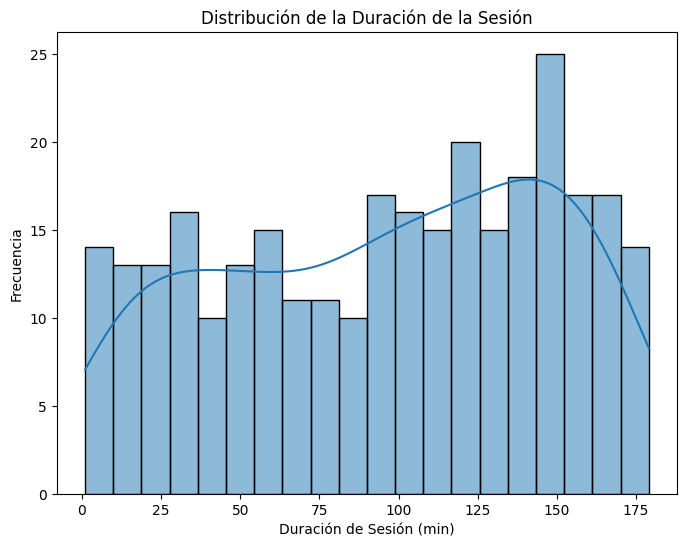

Interpretación: Esto ayuda a entender la duración típica de sesiones y posibles valores extremos.


In [16]:
# Histograma de duración de la sesión
plt.figure(figsize=(8, 6))
sns.histplot(data['session_duration'], bins=20, kde=True)
plt.title('Distribución de la Duración de la Sesión')
plt.xlabel('Duración de Sesión (min)')
plt.ylabel('Frecuencia')
plt.show()

print('''Interpretación: Esto ayuda a entender la duración típica de sesiones y posibles valores extremos.''')

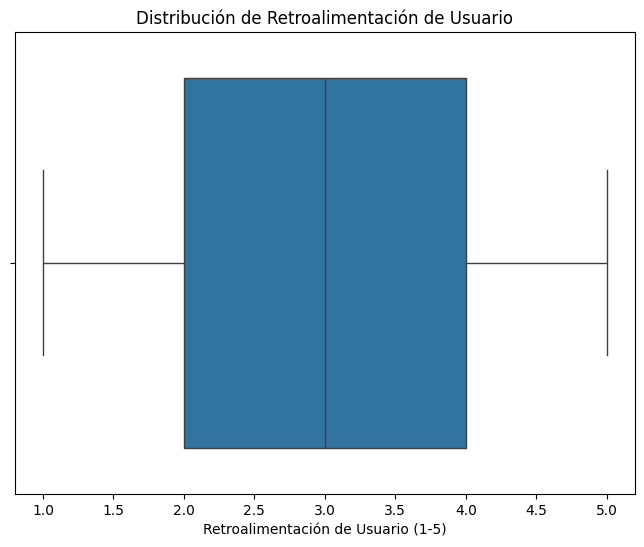

Interpretación: Este gráfico muestra la dispersión y la mediana de la puntuación de retroalimentación.


In [19]:
# Boxplot de la retroalimentación del usuario
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['user_feedback'])
plt.title('Distribución de Retroalimentación de Usuario')
plt.xlabel('Retroalimentación de Usuario (1-5)')
plt.show()

print("Interpretación: Este gráfico muestra la dispersión y la mediana de la puntuación de retroalimentación.")

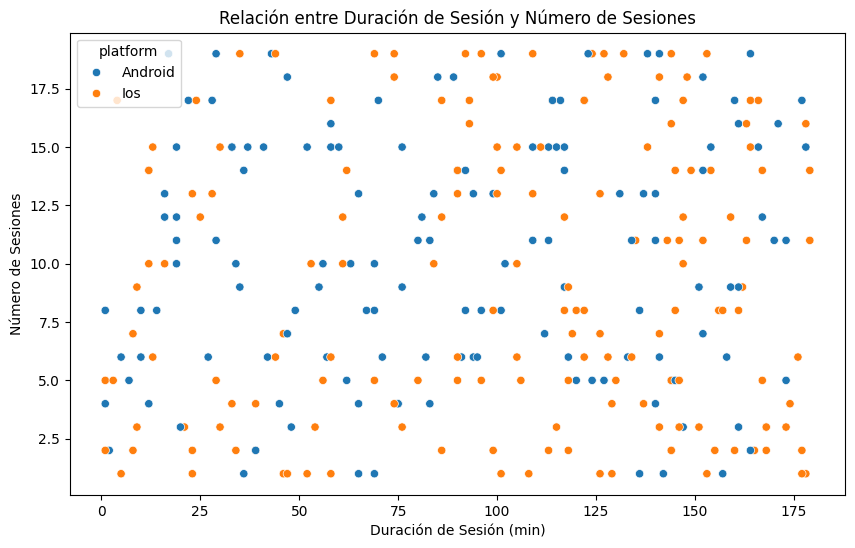

Interpretación: Este gráfico permite observar la relación entre el tiempo y la frecuencia de uso de la app.


In [21]:
# Scatterplot entre duración de sesión y número de sesiones
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='session_duration', y='number_of_sessions', hue='platform')
plt.title('Relación entre Duración de Sesión y Número de Sesiones')
plt.xlabel('Duración de Sesión (min)')
plt.ylabel('Número de Sesiones')
plt.show()

print("Interpretación: Este gráfico permite observar la relación entre el tiempo y la frecuencia de uso de la app.")

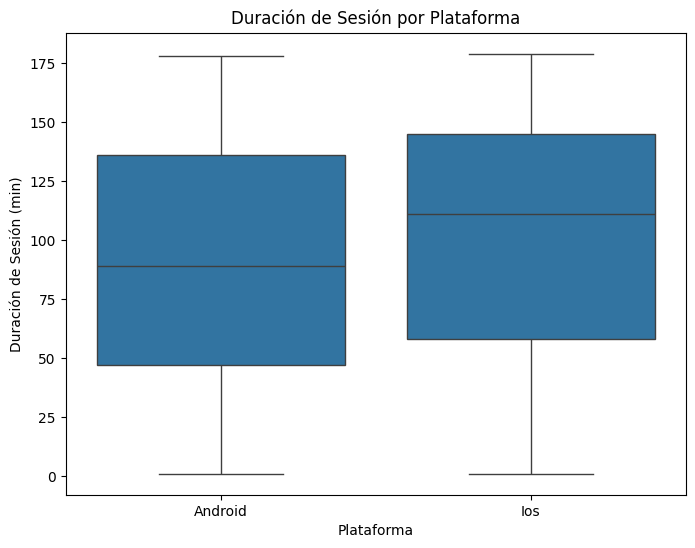

Interpretación: Aquí observamos si existen diferencias de duración de sesión entre Android e iOS.


In [22]:
# Comparación de duración de sesión por plataforma
plt.figure(figsize=(8, 6))
sns.boxplot(x='platform', y='session_duration', data=data)
plt.title('Duración de Sesión por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Duración de Sesión (min)')
plt.show()

print('Interpretación: Aquí observamos si existen diferencias de duración de sesión entre Android e iOS.')
